<a href="https://colab.research.google.com/github/meidianarahmawati/mlt2hc7/blob/meidiana/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Kelompok Healthcare 7 



## Dataset


In [1]:
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/dataset.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_Description.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_precaution.csv

--2022-07-13 06:52:03--  https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632202 (617K) [text/plain]
Saving to: ‘dataset.csv.3’

dataset.csv.3       100%[===================>] 617.38K  --.-KB/s    in 0.04s   

2022-07-13 06:52:03 (13.9 MB/s) - ‘dataset.csv.3’ saved [632202/632202]

--2022-07-13 06:52:03--  https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_Description.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11025 (11K) [te

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('dataset.csv')

## Exploratory Data Analysis

Pada bagian berikut ini akan dilakukan exploratory data analysis pada dataset.csv untuk melihat profil datanya.


## Preprocessing

Pada bagian berikut ini kolom symptom pada dataset akan diubah dengan pd.pivot_table agar dapat diproses.


In [4]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cols = [i for i in df.iloc[:,1:].columns]
tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [6]:
diseases = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')
diseases.insert(0,'Disease',df['Disease'])
diseases = diseases.fillna(0)
diseases.head()

value,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
diseases.shape

(4920, 132)

In [11]:
ds_train = diseases.sample(frac = 0.8, random_state = 1)
ds_test = diseases.drop(index = ds_train.index)

x_train, y_train, x_test, y_test =  ds_train.drop('Disease', axis = 1),\
                                    ds_train['Disease'],\
                                    ds_test.drop('Disease', axis = 1),\
                                    ds_test['Disease']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3936, 131) (3936,) (984, 131) (984,)


In [12]:
labeldisease = y_train.unique()
le = LabelEncoder()
le.fit(y_train)
labeldisease = le.transform(labeldisease)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

## Model

Pada bagian ini akan dibuat model Decision Forest dari TensorFlow


In [ ]:
!pip install tensorflow_decision_forests

In [14]:
import tensorflow_decision_forests as tfdf

In [15]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(ds_train, label="Disease")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(ds_test, label="Disease")

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [16]:
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmptsn35a29 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:12.652021. Found 3936 examples.
Training model...
Model trained in 0:00:06.717287
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [17]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.9970
loss: 0.0000
accuracy: 0.9970


In [18]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=15)

In [19]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (131):
	_abdominal_pain
	_abnormal_menstruation
	_acidity
	_acute_liver_failure
	_altered_sensorium
	_anxiety
	_back_pain
	_belly_pain
	_blackheads
	_bladder_discomfort
	_blister
	_blood_in_sputum
	_bloody_stool
	_blurred_and_distorted_vision
	_breathlessness
	_brittle_nails
	_bruising
	_burning_micturition
	_chest_pain
	_chills
	_cold_hands_and_feets
	_coma
	_congestion
	_constipation
	_continuous_feel_of_urine
	_continuous_sneezing
	_cough
	_cramps
	_dark_urine
	_dehydration
	_depression
	_diarrhoea
	_dischromic__patches
	_distention_of_abdomen
	_dizziness
	_drying_and_tingling_lips
	_enlarged_thyroid
	_excessive_hunger
	_extra

In [20]:
model.make_inspector().evaluation()

Evaluation(num_examples=3936, accuracy=0.9959349593495935, loss=0.08467627779322268, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [21]:
model.make_inspector().features()

["_abdominal_pain" (1; #0),
 "_abnormal_menstruation" (1; #1),
 "_acidity" (1; #2),
 "_acute_liver_failure" (1; #3),
 "_altered_sensorium" (1; #4),
 "_anxiety" (1; #5),
 "_back_pain" (1; #6),
 "_belly_pain" (1; #7),
 "_blackheads" (1; #8),
 "_bladder_discomfort" (1; #9),
 "_blister" (1; #10),
 "_blood_in_sputum" (1; #11),
 "_bloody_stool" (1; #12),
 "_blurred_and_distorted_vision" (1; #13),
 "_breathlessness" (1; #14),
 "_brittle_nails" (1; #15),
 "_bruising" (1; #16),
 "_burning_micturition" (1; #17),
 "_chest_pain" (1; #18),
 "_chills" (1; #19),
 "_cold_hands_and_feets" (1; #20),
 "_coma" (1; #21),
 "_congestion" (1; #22),
 "_constipation" (1; #23),
 "_continuous_feel_of_urine" (1; #24),
 "_continuous_sneezing" (1; #25),
 "_cough" (1; #26),
 "_cramps" (1; #27),
 "_dark_urine" (1; #28),
 "_dehydration" (1; #29),
 "_depression" (1; #30),
 "_diarrhoea" (1; #31),
 "_dischromic__patches" (1; #32),
 "_distention_of_abdomen" (1; #33),
 "_dizziness" (1; #34),
 "_drying_and_tingling_lips" (1;

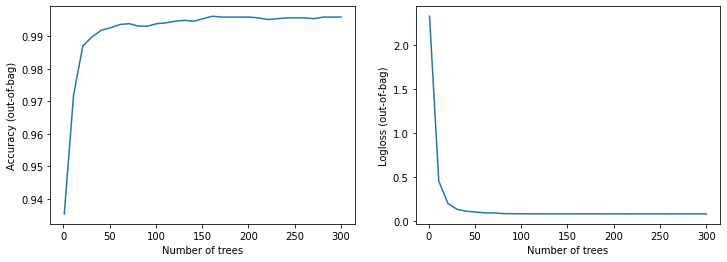

In [22]:
logs = model.make_inspector().training_logs()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.show()

In [23]:
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
ds_test['y_pred']=y_pred
ds_test

1/1 [==============================] - 0s 318ms/step


value,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching,y_pred
index,,,,,,,,,,,,,,,,,,,,,
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15
9,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15
14,Allergy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
15,Allergy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
18,Allergy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,Hepatitis E,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,22
4905,Common Cold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4908,Heart attack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18


## Confusion Matrix dan Classification Report

Pada bagian ini akan dibuat modelnya


## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.